# Part of Speech 
Converting a sentence to forms – list of words, list of tuples (where each tuple is having a form (word, tag)). The tag in case of is a part-of-speech tag, and signifies whether the word is a noun, adjective, verb, and so on.



A part-of-speech tagger, or POS-tagger, processes a sequence of words, and attaches a part of speech tag to each word (don't forget to import nltk):

In [ ]:
nltk.download('averaged_perceptron_tagger') #Download this module which required in word tagging

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
from nltk import pos_tag
from nltk.tokenize import word_tokenize



sentence =  word_tokenize("And now for something completely different")   # Tag parts of speech (PoS)

print(pos_tag(sentence))

[('And', 'CC'), ('now', 'RB'), ('for', 'IN'), ('something', 'NN'), ('completely', 'RB'), ('different', 'JJ')]


Note: Here we see that and is CC, a coordinating conjunction; now and completely are RB, or adverbs; for is IN, a preposition; something is NN, a noun; and different is JJ, an adjective.

You can refer to the NLTK documentation for more details.


# N-gram
N-Grams allows us to predict the next words of a text followed build this text mining forecasting model.


In [ ]:
from nltk.util import ngrams
from collections import Counter

text    = 'FinTech is a publication'
grams_1 = ngrams(nltk.word_tokenize(text), 1) # prints 1 gram as an output
grams_2 = ngrams(nltk.word_tokenize(text), 2) # prints 2 grams as an output
grams_3 = ngrams(nltk.word_tokenize(text), 3) # prints 3 grams as an output and so on

for i in grams_1:

   print(i)

print("--------------------------------")   


for i in grams_2:

   print(i)

print("--------------------------------")   

for i in grams_3:

   print(i)      

('FinTech',)
('is',)
('a',)
('publication',)
--------------------------------
('FinTech', 'is')
('is', 'a')
('a', 'publication')
--------------------------------
('FinTech', 'is', 'a')
('is', 'a', 'publication')


# Named Entity Recognition

Basically its a part of information extraction process.

How information extraction happens!<br>
**STEP 1:** The raw text of the document is split into sentences using a sentence segmentation.<br>
**STEP 2:** Each sentence is further subdivided into words using a tokenization.<br>
**STEP 3:** Each sentence is tagged with part-of-speech tags, which will prove very helpful in the next step, **named entity detection** .<br>
**STEP 4**: In this step, we search for mentions of potentially interesting entities in each sentence.<br>
STEP 5: we use **relation detection** to search for likely relations between different entities in the text.<br>

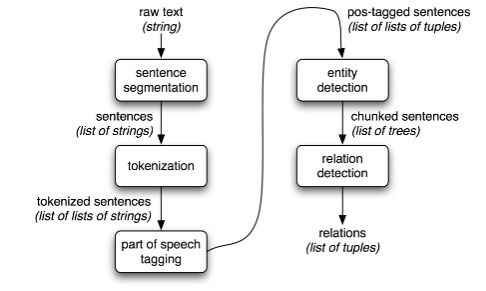

In [ ]:
sentence  = [("the", "DT"), ("little", "JJ"), ("yellow", "JJ"),("dog", "NN"), ("barked", "VBD"), ("at", "IN"),  ("the", "DT"), ("cat", "NN")]

grammar   = "NP: {<DT>?<JJ>*<NN>}"

cp        = nltk.RegexpParser(grammar)
result    = cp.parse(sentence)

print(result)

(S
  (NP the/DT little/JJ yellow/JJ dog/NN)
  barked/VBD
  at/IN
  (NP the/DT cat/NN))


By running in result.draw() on your local machine it will give a nice graph like structure based on the result variable

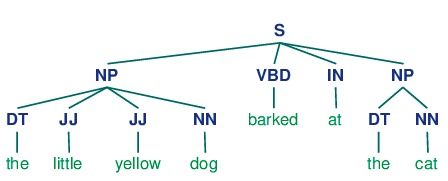

# **Bag of words**

Whenever we apply any algorithm in NLP, it works on numbers. We cannot directly feed our text into that algorithm. Hence, Bag of Words model is used to preprocess the text by converting it into a bag of words, which keeps a count of the total occurrences of most frequently used words.

The bag-of-words (BOW) model is a representation that turns arbitrary text into fixed-length vectors by counting how many times each word appears. This process is often referred to as vectorization.


In [ ]:
from keras.preprocessing.text import Tokenizer

docs  = [
  'the cat sat',
  'the cat sat in the hat',
  'the cat with the hat',
]

## Step 1: Determine the Vocabulary
tokenizer = Tokenizer()
tokenizer.fit_on_texts(docs)

print(f'Vocabulary: {list(tokenizer.word_index.keys())}')

## Step 2: Count
vectors = tokenizer.texts_to_matrix(docs, mode='count')
print(vectors)

Vocabulary: ['the', 'cat', 'sat', 'hat', 'in', 'with']
[[0. 1. 1. 1. 0. 0. 0.]
 [0. 2. 1. 1. 1. 1. 0.]
 [0. 2. 1. 0. 1. 0. 1.]]


# **TF-IDF**

Tf-idf is one of the best metrics to determine how significant a term is to a text in a series or a corpus. tf-idf is a weighting system that assigns a weight to each word in a document based on its term frequency (tf) and the reciprocal document frequency (tf) (idf). The words with higher scores of weight are deemed to be more significant.

Usually, the tf-idf weight consists of two terms-

Normalized Term Frequency (tf)<br>
Inverse Document Frequency (idf)<br>

```tf-idf(t, d) = tf(t, d) * idf(t)```

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

data = {
  'the cat sat',
  'the cat sat in the hat',
  'the cat with the hat',}

vectoriser = TfidfVectorizer()
vec        = vectoriser.fit_transform(data)
df         = pd.DataFrame(vec.toarray().transpose(), index = vectoriser.get_feature_names()

print(df)

             0         1         2
cat   0.522842  0.299034  0.324019
hat   0.000000  0.385061  0.417233
in    0.000000  0.506309  0.000000
sat   0.673255  0.385061  0.000000
the   0.522842  0.598068  0.648038
with  0.000000  0.000000  0.548612


# **Summary of NLP pipeline**

Spam Filter using NLP

Let us take an example dataset of an SMS Spam Collection which also has a label on it that classifies it as spam or not.

Firstly , we load our dataset into our drive & then use pandas to import it in the form of a dataframe.

In [ ]:
import pandas as pd

df = pd.read_table('/content/drive/MyDrive/Colab Notebooks/smsspamcollection/SMSSpamCollection', # Dataset from - https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection
                   sep='\t', 
                   header=None, 
                   names=['label', 'sms_message'])

# Output printing out first 5 rows
df.head()

,label,sms_message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Here we can see the labels are either "ham" or "spam". So, we will label encode these into 0 & 1 respectively.

In [ ]:
df['label'] = df.label.map({'ham':0, 'spam':1})

print(df.shape)

df.head()                   # returns (rows, columns)

(5572, 2)


,label,sms_message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### **Preprocessing**

Here we perform the basic techniques of preprocessing that we learnt a while ago. Let has have a look at them again

In [ ]:
documents = ['Hello, how are you!',
             'Win money, win from home.',
             'Call me now.',
             'Hello, Call hello you tomorrow?']

lower_case_documents = []

for i in documents:

    lower_case_documents.append(i.lower())
    
print(lower_case_documents)

['hello, how are you!', 'win money, win from home.', 'call me now.', 'hello, call hello you tomorrow?']


In [ ]:
import string

sans_punctuation_documents = []


for i in lower_case_documents:

    sans_punctuation_documents.append(i.translate(str.maketrans('', '', string.punctuation)))
    
print(sans_punctuation_documents)

['hello how are you', 'win money win from home', 'call me now', 'hello call hello you tomorrow']


Now , we find the Frequency of each word using Counter library

In [ ]:
import pprint
from collections import Counter

frequency_list = []

for i in preprocessed_documents:

    frequency_counts = Counter(i)
    frequency_list.append(frequency_counts)

pprint.pprint(frequency_list)

[Counter({'hello': 1, 'how': 1, 'are': 1, 'you': 1}),
 Counter({'win': 2, 'money': 1, 'from': 1, 'home': 1}),
 Counter({'call': 1, 'me': 1, 'now': 1}),
 Counter({'hello': 2, 'call': 1, 'you': 1, 'tomorrow': 1})]


In [ ]:
documents = ['Hello, how are you!',
                'Win money, win from home.',
                'Call me now.',
                'Hello, Call hello you tomorrow?']




we implemented a version of the CountVectorizer() method from scratch that entailed cleaning our data first. This cleaning involved converting all of our data to lower case and removing all punctuation marks. CountVectorizer() has certain parameters which take care of these steps for us. They are:

lowercase = True

The lowercase parameter has a default value of True which converts all of our text to its lower case form.

token_pattern = (?u)\\b\\w\\w+\\b

The token_pattern parameter has a default regular expression value of (?u)\\b\\w\\w+\\b which ignores all punctuation marks and treats them as delimiters, while accepting alphanumeric strings of length greater than or equal to 2, as individual tokens or words.

stop_words

The stop_words parameter, if set to english will remove all words from our document set that match a list of English stop words which is defined in scikit-learn. Considering the size of our dataset and the fact that we are dealing with SMS messages and not larger text sources like e-mail, we will not be setting this parameter value.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vector = CountVectorizer()

In [ ]:
print(count_vector)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


For example , we can see previously , we used our list called -> **Documents**. After implementing we observe the features.

In [ ]:
count_vector.fit(documents)
count_vector.get_feature_names()

['are',
 'call',
 'from',
 'hello',
 'home',
 'how',
 'me',
 'money',
 'now',
 'tomorrow',
 'win',
 'you']

Now let us find the frequency matrix for each word & print it out through a pandas dataframe.

In [ ]:
doc_array = count_vector.transform(documents).toarray()
doc_array

array([[1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1]])

In [ ]:
frequency_matrix = pd.DataFrame(doc_array, 
                                columns = count_vector.get_feature_names())
frequency_matrix

,are,call,from,hello,home,how,me,money,now,tomorrow,win,you
0,1,0,0,1,0,1,0,0,0,0,0,1
1,0,0,1,0,1,0,0,1,0,0,2,0
2,0,1,0,0,0,0,1,0,1,0,0,0
3,0,1,0,2,0,0,0,0,0,1,0,1


Interesting right? 
Now that we have got a basic intuition of how it looks like , let us apply it to our dataset & see how it pans out.


Firstly , we will distribute our dataset into test & train. 
After that we will see the number of rows for each

Now that we have understood how to deal with the Bag of Words problem we can get back to our dataset and proceed with our analysis. Our first step in this regard would be to split our dataset into a training and testing set so we can test our model later

In [ ]:
# split into training and testing sets
# USE from sklearn.model_selection import train_test_split to avoid seeing deprecation warning.
 
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(df['sms_message'], 
                                                    df['label'], 
                                                    random_state=1)
 
print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 5572
Number of rows in the training set: 4179
Number of rows in the test set: 1393


Great, now that we have that, we can implement our CountVectorizer & fit it to train from our **" X_train**

In [ ]:
# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test)

I am going to be using a Simple Machine Learning algorithm called **Naive Bayes** for our classification problem.

In [ ]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
predictions = naive_bayes.predict(testing_data)

We will use some accuracy metrics to see how well our model performed

**Accuracy -** Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations.

**Precision -** Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. 


**Recall -** Recall is the ratio of correctly predicted positive observations to the all observations in actual class.

**F1 score -** F1 Score is the weighted average of Precision and Recall.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions)))
print('Recall score: ', format(recall_score(y_test, predictions)))
print('F1 score: ', format(f1_score(y_test, predictions)))

Accuracy score:  0.9885139985642498
Precision score:  0.9720670391061452
Recall score:  0.9405405405405406
F1 score:  0.9560439560439562
